## Explorando Dados e Modelos Não Supervisionados para Insights Empresariais

Ana Paula Vanderley

---


*  Este trabalho buscou investigar e analisar os dados de uma  concessionária de caminhões (DADOS REAIS algumas analises foram omitidas), em busca de fornecer insights  para os gestores da empresa. Nossa abordagem apliquei técnicas estatísticas como análise exploratória de dados (EDA), com foco especial na análise temporal dos dados. Além disso, apliquei técnicas de modelagem não supervisionada, como Análise de Componentes Principais (PCA) e o algoritmo K-Means.


*  Este processo incluiu uma EDA detalhada, onde foi verificado tendências, padrões e anomalias nos dados. Além disso, a análise temporal foi aplicada para compreender como o desempenho da empresa tem evoluído ao longo do tempo. Isso npermitiu identificar sazonalidades, ciclos de negócios e outras informações temporais relevantes que possam influenciar as operações da concessionária.




*  Após a conclusão da análise exploratória de dados, foi aplicado técnicas de modelagem não supervisionada para aprofundar a compreensão dos dados. Primeiramente, a Análise de Componentes Principais (PCA) para reduzir a dimensionalidade do conjunto de dados, simplificando-o enquanto mantemos a maior parte da variância original. Em seguida,  o algoritmo K-Means para agrupar os dados em clusters significativos com base em suas características.


**Objetivos:**

*  Identificar padrões e tendências nos dados.
*  Compreender a evolução temporal do desempenho da empresa.
*  Extrair insights acionáveis utilizando técnicas de modelagem não supervisionada.
*  Fornecer recomendações e orientações estratégicas para os gestores da empresa com base nos resultados da análise.


VARIÁVEIS PRESENTE NO BANCO DE DADOS

---



TAMANHO DA BASE

---



In [ ]:
# @title
df.shape
print(f"Total de registros: {df.shape[0]}")
print(f"Total de variáveis: {df.shape[1]}")

Total de registros: 9975
Total de variáveis: 23


NULOS POR VARIÁVEL

---



In [ ]:
# @title
null_df = df.isna().sum()
porcentagem_nulos = df.isna().mean() * 100

resultados = pd.concat([null_df, porcentagem_nulos], axis=1)
resultados.columns = ['Valores Nulos', 'Porcentagem de Nulos']
resultados['Porcentagem de Nulos'] = resultados['Porcentagem de Nulos'].apply(lambda x: f'{x:.2f}%')

resultados

,Valores Nulos,Porcentagem de Nulos
DATA E HORA,0,0.00%
NaturezaOperacao,0,0.00%
DEPARTAMENTO QUE VENDEU (OFICINA OU BALCÃO),0,0.00%
CONDIÇÃO DE PAGAMENTO,0,0.00%
NFItem_PercDesc,0,0.00%
QtdeEstoque,0,0.00%
VlMargemCont,0,0.00%
NOME DA PEÇA,0,0.00%
VENDEDOR,0,0.00%
VlDesc,0,0.00%


## EDA (Análise Exploratória de Dados)

MEDIDAS DESCRITIVAS

---



In [ ]:
# @title
desc_stats = df.describe(include='all')
desc_stats

,DATA E HORA,NaturezaOperacao,DEPARTAMENTO QUE VENDEU (OFICINA OU BALCÃO),CONDIÇÃO DE PAGAMENTO,NFItem_PercDesc,QtdeEstoque,VlMargemCont,NOME DA PEÇA,VENDEDOR,VlDesc,...,ProdPrecoValor,ClasABC,ValorICMS,ValorICMSST,ValorPisCofins,ValorLucroBruto,VALOR DA VENDA,NFItem_VlBruto,NFItem_PercMargemCont,NFItem_PercMargemGer
count,9975,9975,9975,9975,9975.000000,9975.000000,9975.000000,9975,9975,9975.000000,...,9975.00000,9975,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000,9975.000000
unique,3370,1,2,17,NaN,NaN,NaN,1372,7,NaN,...,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,20/06/2019 15:35:00,VEN,OFI,BOL. 30 DIAS,NaN,NaN,NaN,CARTUCHO ELEM. FILTRO,ICARO,NaN,...,NaN,A3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,51,9975,5038,2286,NaN,NaN,NaN,242,3516,NaN,...,NaN,5421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.612488,2.496040,141.114661,NaN,NaN,53.550660,...,260.79008,NaN,5.943973,0.430807,14.502440,418.888009,403.797359,457.348019,35.534394,0.355344
std,NaN,NaN,NaN,NaN,9.409881,6.318097,296.175585,NaN,NaN,222.533475,...,585.38690,NaN,38.046206,14.855516,36.260218,842.874148,827.910871,985.149621,26.781387,0.267814
min,NaN,NaN,NaN,NaN,0.000000,1.000000,-1438.500000,NaN,NaN,0.000000,...,0.00000,NaN,0.000000,0.000000,0.000000,0.500000,0.460000,0.460000,-2162.370000,-21.623700
25%,NaN,NaN,NaN,NaN,0.000000,1.000000,25.175000,NaN,NaN,0.000000,...,52.56000,NaN,0.000000,0.000000,0.000000,88.990000,84.980000,93.520000,28.060000,0.280600
50%,NaN,NaN,NaN,NaN,9.990000,1.000000,59.820000,NaN,NaN,6.800000,...,111.60000,NaN,0.000000,0.000000,3.990000,190.960000,180.000000,195.410000,36.940000,0.369400
75%,NaN,NaN,NaN,NaN,14.985000,2.000000,137.190000,NaN,NaN,36.875000,...,236.27000,NaN,0.000000,0.000000,17.115000,407.880000,389.365000,431.590000,44.455000,0.444550


DESCRIÇÃO DAS VARIÁVEIS CATEGORICAS

---



In [ ]:
# @title
for col in categoricas:
    print(f'Coluna: {col}')
    print(f'Valores únicos: {df[col].unique()}')
    valor_moda = df[col].mode()[0]
    print(f'Valor da moda: {valor_moda}')
    print('-' * 100)

Coluna: NaturezaOperacao
Valores únicos: ['VEN']
Categories (1, object): ['VEN']
Valor da moda: VEN
----------------------------------------------------------------------------------------------------
Coluna: DEPARTAMENTO QUE VENDEU (OFICINA OU BALCÃO)
Valores únicos: ['OFI', 'BLC']
Categories (2, object): ['BLC', 'OFI']
Valor da moda: OFI
----------------------------------------------------------------------------------------------------
Coluna: CONDIÇÃO DE PAGAMENTO
Valores únicos: ['BOL. 30 / 60 DIAS', 'BOL. 30 DIAS', 'BOL. 30 / 60 / 90 DIAS', 'RECEBIDO ANTECIPADAMENTE (PECAS / SERVICOS)', 'A VISTA', ..., 'BOL. 28 / 56 DIAS', 'EMPRESAS DO GRUPO', 'C / APRESENTACAO', 'BOL. 30 / 60 / 90 / 120 / 150 / 180 DIAS', 'BOL. 30 / 60 / 90 / 120 / 150 DIAS']
Length: 17
Categories (17, object): ['A VISTA', 'BOL. 28 / 56 DIAS', 'BOL. 28/56/84 DIAS',
                          'BOL. 28/56/84/112 DIAS', ..., 'GARANTIA', 'PARCELAS VARIADAS (R)',
                          'RECEBIDO ANTECIPADAMENTE (PE

VALORES ÚNICOS POR VARIÁVEL

---



In [ ]:
# @title
df.nunique().reset_index(name='Valores únicos')

,index,Valores únicos
0,DATA E HORA,3370
1,NaturezaOperacao,1
2,DEPARTAMENTO QUE VENDEU (OFICINA OU BALCÃO),2
3,CONDIÇÃO DE PAGAMENTO,17
4,NFItem_PercDesc,590
5,QtdeEstoque,45
6,VlMargemCont,6644
7,NOME DA PEÇA,1372
8,VENDEDOR,7
9,VlDesc,3492


## ANÁLISE TEMPORAL

---



VALOR DAS VENDAS MENSAIS

---



In [ ]:
# @title
fig = px.line(vendas_mensais, x='Mês', y='VALOR DA VENDA', color='Ano',
              labels={'VALOR DA VENDA': 'Total de Vendas', 'Mês': 'Mês', 'Ano': 'Ano'},
              title='Vendas Mensais')
fig.show()

VALOR DAS VENDAS DIÁRIAS

---



In [ ]:
# @title
df['DATA E HORA'] = pd.to_datetime(df['DATA E HORA'])
df['Dia'] = df['DATA E HORA'].dt.date

vendas_diarias = df.groupby('Dia')['VALOR DA VENDA'].sum().reset_index()
print(vendas_diarias)

            Dia  VALOR DA VENDA
0    2019-01-02         5753.46
1    2019-01-03        19738.17
2    2019-01-04        10624.62
3    2019-01-07        27587.74
4    2019-01-08        10703.95
..          ...             ...
212  2019-11-01        20884.54
213  2019-11-04        32298.31
214  2019-11-05         9820.70
215  2019-11-06        12603.99
216  2019-11-07         8342.53

[217 rows x 2 columns]


In [ ]:
# @title
fig = px.line(vendas_diarias, x='Dia', y='VALOR DA VENDA', title='Vendas Diárias')
fig.update_xaxes(title='Dia')
fig.update_yaxes(title='Total de Vendas')
fig.show()

## LUCRO ANUAL DA EMPRESA

---
*  O lucro total é um dos principais indicadores do desempenho financeiro de uma empresa. Ele reflete a capacidade da empresa de gerar lucro a partir de suas operações e demonstra sua eficiência na gestão de custos.

*  Analisar o lucro total permite avaliar a viabilidade financeira do negócio a longo prazo. Um lucro consistente e crescente indica que a empresa está saudável financeiramente e tem potencial para crescimento sustentável.

---

*  O lucro total de uma empresa é calculado subtraindo-se os custos totais das receitas totais durante um determinado período de tempo. Em outras palavras, a fórmula básica para calcular o lucro é:

Lucro Total
=
Receita Total
−
Custos Totais
Lucro Total=Receita Total−Custos Totais


## LUCRO MENSAL

---



In [ ]:
# @title
fig = px.line(lucro_mensal, x='Ano_Mês', y='Lucro', title='Lucro Mensal da Empresa')
fig.update_xaxes(title='Mês e Ano')
fig.update_yaxes(title='Lucro')
fig.show()


## ANALISE DESEMPENHO DOS FUNCIONARIOS

---



In [ ]:
# @title
fig1 = px.bar(quantidade_por_vendedor, x='QUANTIDADE', y='VENDEDOR', orientation='h',
              title='Quantidade de Produtos Vendidos por Vendedor')
fig1.show()

In [ ]:
# @title
fig2 = px.bar(lucro_por_vendedor, x='Lucro', y='VENDEDOR', orientation='h',
              title='Lucro Gerado por Vendedor')


fig2.show("png")

## ANÁLISE DE PRODUTOS E ESTOQUE

---
A análise de produtos e estoque ajuda a empresa a entender quais produtos estão em alta demanda e quais estão com baixo desempenho. Isso permite uma gestão mais eficiente do inventário, garantindo que haja disponibilidade adequada dos produtos mais procurados e evitando o excesso de estoque de itens com baixa rotatividade.



PRODUTOS MAIS VENDIDOS

---



In [ ]:
# @title
print(top_20_produtos)

                      NOME DA PEÇA  QUANTIDADE
0   OLEO MOTOR LD 7  MINERAL 15W40        3310
1          OLEO DIFERENCIAL 85W140        1509
2   URANIA DAILY LS SINTETICO 5W30        1429
3           CINTA FIXACAO                  765
4                 ADITIVO RADIADOR         658
5               ELEM. FILTRO COMBU         413
6                  ANEL DE VEDACAO         403
7               OLEO MOTOR MINERAL         388
8               CARTUCHO FILT.OLEO         334
9                           REBITE         260
10    REBITE ALUMINIO 10X14 MACICO         260
11          CARTUCHO ELEM. FILTRO          256
12            OLEO HIDRAULICO GI/E         255
13                     ARLA 32 3X6         220
14          JUNTA COLETOR DE ACO           217
15          CARTUCHO FILT.OLEO             203
16             EL. FILTRO COMBUST.         202
17              FILTRO COMB. RACOR         199
18      OLEO URANIA 5W30 SINTETICO         189
19                           BUCHA         178


In [ ]:
# @title
top_20_produtos_sorted = top_20_produtos.sort_values(by='QUANTIDADE', ascending=True)

fig3 = px.bar(top_20_produtos_sorted, x='QUANTIDADE', y='NOME DA PEÇA',
             orientation='h', title='Top 20 Produtos Mais Vendidos',
             labels={'QUANTIDADE': 'Quantidade Vendida', 'NOME DA PEÇA': 'Produto'})
fig3.show("png")

## ESTOQUE

---



In [ ]:
# @title
quantidade_total_estoque = df['QtdeEstoque'].sum()
valor_total_estoque = df['ProdCusto'].sum()

print(f"Quantidade total em estoque: {quantidade_total_estoque}")
print(f"Valor total em estoque: R$ {valor_total_estoque:.2f}")


Quantidade total em estoque: 24898
Valor total em estoque: R$ 2420673.48


Atualmente a empresa tem um total de 24.898 itens em estoque. Essa é uma métrica fundamental que nos ajuda a entender a escala das operações e a capacidade de atender à demanda dos clientes.
Além disso,  o valor total de estoque é de R$ 2.420.673,48. Essa cifra reflete o investimento significativo que empresa fez em  produtos e nos fornece uma visão clara do valor desses ativos físicos.

In [ ]:
# @title
fig2 = px.bar(top_20_estoque, x='NOME DA PEÇA', y='ProdCusto',
              title='Custo de Estoque dos Top 20 Produtos',
              labels={'ProdCusto': 'Custo de Estoque (R$)', 'NOME DA PEÇA': 'Produto'})
fig2.show("png")

#CIÊNCIA DE DADOS

---


A estatística multivariada compreende um
conjunto de técnicas que analisam
simultaneamente um conjunto de variáveis que
caracterizam os objetos ou indivíduos de uma
amostra. Usualmente essas técnicas são classificadas em
técnicas de dependência ou interdependência.

---



*  Nas técnicas de dependência  uma variável (variável dependente) é explicada por outras variáveis (variáveis independentes). Temos como exemplo modelos de regressão múltipla e a análise discriminante.
*  Nas técnicas de interdependência  nenhuma
variável é considerada dependente ou independente,
mas todas as variáveis são analisadas simultaneamente
com a finalidade de encontrar uma estrutura para
todo conjunto de variáveis.São exemplos a análise
fatorial, a análise de cluster, análise de componentes
principais e escalonamento multidimensional.


##NESSE TRABALHO IREMOS UTILIZAR O PCA E O K-MEANS















## PCA

---
*  Em cenários empresariais, geralmente lidamos com conjuntos de dados complexos que possuem várias variáveis, e algumas dessas variáveis podem estar correlacionadas ou possuir multicolinearidade. Isso pode dificultar a interpretação dos dados e afetar a eficácia de algoritmos de aprendizado de máquina, como o K-Means, que exigem que as variáveis sejam independentes.


*  Nesse caso usaremos o PCA para Redução de dimensionalidade do Conjuntos de dados. O PCA ajuda a reduzir a dimensionalidade dos dados, mantendo a maior parte da variância original. Isso simplifica o conjunto de dados, tornando-o mais gerenciável e fácil de interpretar.

*  Ao reduzir a dimensionalidade dos dados com o PCA, os clusters identificados pelo algoritmo K-Means podem se tornar mais distintos e interpretáveis. Isso facilita a compreensão das características dos grupos e a formulação de insights acionáveis para tomada de decisões empresariais.


ESCALONANDO OS DADOS

---



TREINANDO O MODELO

---



In [ ]:
# @title
pca = PCA()
pca.fit(dados_normalizados)

PCA()

VARIÂNCIA EXPLICADA DE CADA COMPONENTE

---



In [ ]:
# @title
print("Variância explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

Variância explicada por cada componente principal:
[6.60255346e-01 2.23661860e-01 6.54274423e-02 2.65962960e-02
 2.02526886e-02 3.06189603e-03 6.94341232e-04 5.01297156e-05
 3.45485062e-31]


NÚMERO DE COMPONENTES PRINCIPAIS QUE EXPLICAM 95% DA VARIABILIDADE

---



In [ ]:
# @title
n_componentes = sum(pca.explained_variance_ratio_ > 0.05)
n_componentes

3

In [ ]:
# @title
dados_finais = pd.concat([df[['NOME DA PEÇA','QtdeEstoque', 'VlDesc', 'ProdPrecoValor', 'ValorLucroBruto']], dados_pca_df], axis=1)
print(dados_finais.head())

             NOME DA PEÇA  QtdeEstoque  VlDesc  ProdPrecoValor  \
0  ABRAC.TUBOS BORRA                 2     0.0           19.82   
1                    ANEL            1     0.0           12.00   
2  ANEL DE VEDAÇÃO TANQUE            1     0.0           21.06   
3     EL. FILTRO COMBUST.            1     0.0          113.87   
4                  FILTRO            1     0.0           97.31   

   ValorLucroBruto  Componente_1  Componente_2  Componente_3  
0            54.17     -1.030573     -0.099680      0.062690  
1            24.18     -1.093517     -0.324928      0.090907  
2            54.30     -1.022503     -0.325241      0.060396  
3           209.33     -0.630754     -0.327128     -0.075613  
4           164.93     -0.696554     -0.326478     -0.058841  


DADOS FINAIS

---



In [ ]:
# @title
list(dados_finais)

['NOME DA PEÇA',
 'QtdeEstoque',
 'VlDesc',
 'ProdPrecoValor',
 'ValorLucroBruto',
 'Componente_1',
 'Componente_2',
 'Componente_3']

GRÁFICO DE COTOVELO QUE NOS INDICA O NÚMERO DE CLUSTERS IDEAL PARA TRABALHAR

---
Nesse exemplo foram 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

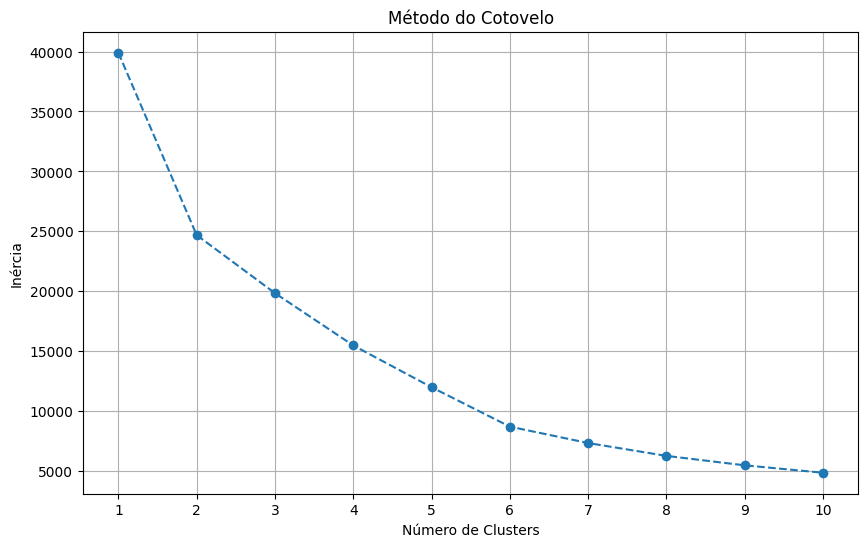

In [ ]:
# @title
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inercia.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inercia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## K-MEANS

---

*  O k-means é usado para agrupar dados em conjuntos distintos com base em suas características. O objetivo do algoritmo K-means é dividir um conjunto de pontos de dados em "K" grupos (clusters) diferentes, onde cada ponto de dados pertence a um cluster com base em sua proximidade com os outros pontos de dados no mesmo cluster.


 *  A utilização do modelo K-Means nos proporcionará uma visão abrangente da estrutura de preços e lucro bruto da empresa e nos ajudará a identificar oportunidades para uma gestão mais eficiente.

*  Ao agrupar produtos com características semelhantes, será possivel implementar estratégias de gestão de marketing mais direcionadas e eficazes, reduzindo custos, melhorando a disponibilidade de produtos e aumentando a satisfação do cliente.



---
*  O modelo K-Means agrupará os dados em clusters com base na similaridade entre os Produtos vendidos e suas preços. Ele calculará os centroides de cada cluster, que representam os "centros" dos grupos de itens semelhantes.
O algoritmo K-Means tentará minimizar a variação intra-cluster e maximizar a variação inter-cluster, agrupando os itens com base nos seus preços e de lucro gerado por cada produto  para  a empresa de forma coesa e distintiva.



---




In [ ]:
# @title
k = 2  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(dados_normalizados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2, random_state=42)

DADOS SEGMENTADOS

---
Temos aqui as variáveis indicadas pelo PCA como as influentes no noso conjunto de dados e usaremos elas para representar os clusters no qual definimos 2 clusters.


In [ ]:
# @title
dados_segmentacao

,NOME DA PEÇA,QtdeEstoque,VlDesc,ProdPrecoValor,ValorLucroBruto,Cluster
0,ABRAC.TUBOS BORRA,2,0.00,19.82,54.17,0
1,ANEL,1,0.00,12.00,24.18,0
2,ANEL DE VEDAÇÃO TANQUE,1,0.00,21.06,54.30,0
3,EL. FILTRO COMBUST.,1,0.00,113.87,209.33,0
4,FILTRO,1,0.00,97.31,164.93,0
...,...,...,...,...,...,...
9970,VENTILADOR,1,24.47,131.14,220.35,0
9971,SUPORTE DIR.CENT.COMPL,1,0.00,323.15,608.08,0
9972,SUPORTE INFERIOR DIREI,1,0.00,240.57,452.05,0
9973,CARTUCHO DO FILTRO,1,37.77,59.34,67.39,0


##O Objetivo aqui é mostrar como o preço do produto se relaciona com o lucro bruto e como isso difere entre os clusters.

---



In [ ]:
# @title
dados_plotly = dados_segmentacao.copy()
dados_plotly['text'] = dados_plotly['NOME DA PEÇA']

# Plotar com Plotly
fig = px.scatter(dados_plotly, x='ProdPrecoValor', y='ValorLucroBruto', color='Cluster', hover_name='text', title='Segmentação de Produtos por Preço e Lucro')
fig.update_traces(marker=dict(size=10, opacity=0.5))
fig.update_layout(title='Segmentação de Produtos por Preço e Lucro Bruto', xaxis_title='ProdPrecoValor', yaxis_title='ValorLucroBruto')
fig.show("png")

MÉDIAS POR CLUSTERS

---



In [ ]:
# @title
medias_por_cluster = dados_segmentacao.groupby('Cluster')['ProdPrecoValor'].mean()

print(medias_por_cluster)

Cluster
0     197.042039
1    3526.291832
Name: ProdPrecoValor, dtype: float64


Os produtos pertencentes ao cluster 0 tem média de valor de aproximadamente  197,04 , já  os  produtos pertencentes ao cluster 1 tem média de valor de  3.526,29.

---






*  O cluster **0** nos mostra  produtos com um preço médio relativamente baixo e um lucro bruto correspondente. O que nos indica que esses produtos podem estar posicionados no mercado como opções mais acessíveis ou de entrada. Indicando uma estratégia de penetração de mercado, onde a empresa busca atrair clientes oferecendo produtos a preços competitivos, com margens de lucro mais modestas.

 Uma estratégia para esse grupo de produtos seria focar em volumes de vendas para compensar margens de lucro menores.

---


*  Já o cluster  **1** são produtos com um preço médio muito mais alto e, presumivelmente, margens de lucro bruto também mais elevadas. São produtos  premium ou de luxo, destinados a um segmento de mercado mais exclusivo.

 Nesse grupo de produtos podemos ver uma estratégia de diferenciação , onde a empresa busca se destacar da concorrência oferecendo produtos de alta qualidade com margens de lucro bem maiores.

 O foco nesse caso está mais na qualidade do que na quantidade, podemos nesse caso intencificar as estratégias de marketing e vendas  para atrair consumidores dispostos a pagar um preço mais alto por valor percebido superior.